In [17]:
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
import matplotlib.pyplot as plt
import math

In [353]:
N=100
train_x = np.random.random(N)
train_x.sort()
train_y = 4 * train_x ** 3 + 0.5 * train_x ** 2 - 3 * train_x + 2

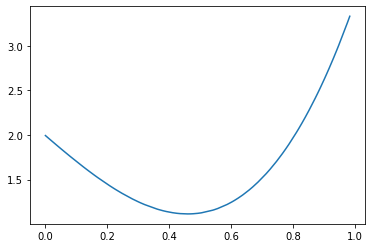

In [354]:
plt.plot(train_x, train_y)

In [376]:
M=60
test_x =np.random.random(M)
test_x.sort()

In [377]:
def kernel(x, xx):
    return np.exp(-0.5*np.linalg.norm(x- xx)**2)

In [378]:
Kxx = np.zeros((N, N))
Kxx_ = np.zeros((N, M))
Kx_x = np.zeros((M, N))
Kx_x_ = np.zeros((M, M))

In [379]:
for x in range(N):
    for y in range(N):
        Kxx[x, y] = kernel(train_x[x], train_x[y])
        
for x in range(N):
    for y in range(M):
        Kxx_[x,y] = kernel(train_x[x], test_x[y])
    
for x in range(M):
    for y in range(N):
        Kx_x[x,y] = kernel(test_x[x], train_x[y])
        
for x in range(M):
    for y in range(M):
        Kx_x_[x, y] = kernel(test_x[x], test_x[y])

In [380]:
mean = Kx_x @ np.linalg.inv(Kxx + 0.04 * np.eye(N)) @ train_y 
cov = Kx_x_ - Kx_x @ np.linalg.inv(Kxx + 0.04 * np.eye(N)) @ Kxx_

In [381]:
test_y = mnorm(mean=mean, cov=cov).rvs(1)

LinAlgError: singular matrix

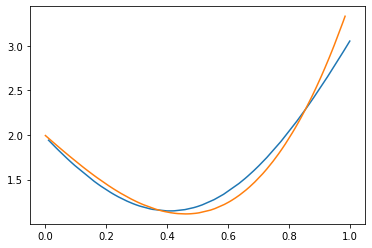

In [382]:
plt.plot(test_x, mean)
plt.plot(train_x, train_y)

In [387]:
def f(x):
    k = np.array([kernel(xi, x) for xi in train_x])
    return alpha @ k

In [388]:
alpha = np.linalg.inv(Kxx + 0.04 * np.eye(N)) @ train_y

In [391]:
x = np.linspace(0, 1, 50)

In [394]:
y = np.array([f(i) for i in x])

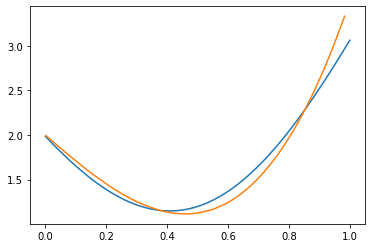

In [397]:
plt.plot(x, y)
plt.plot(train_x, train_y)